## **1. SETUP AND LIBRARIES**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# Set plot style
sns.set_style('whitegrid')

In [9]:
# --- Download necessary NLTK data (only needs to be done once) ---
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    print("Downloading NLTK WordNet...")
    nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **2. LOAD DATA**

In [12]:
is_dummy_data = False
df = pd.read_csv('/content/movie.csv')

## **3. EXPLORATORY DATA ANALYSIS (EDA)**

In [13]:
print("\n--- Starting Exploratory Data Analysis (EDA) ---")

print("\n1. Data Head:")
df.head()


--- Starting Exploratory Data Analysis (EDA) ---

1. Data Head:


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


Are there any duplicate entries?

In [14]:
num_duplicates = df.duplicated().sum()
print(f"\n2. Number of duplicate entries: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate entries have been removed.")


2. Number of duplicate entries: 277
Duplicate entries have been removed.


Are there any missing entries?

In [16]:
print("\n3. Missing values check:")
print(df.isnull().sum())
# df.dropna(inplace=True)


3. Missing values check:
text     0
label    0
dtype: int64


Is the data inconsistent? (Check label column)

In [17]:
print("\n4. Label column value counts:")
print(df['label'].value_counts())


4. Label column value counts:
label
1    19908
0    19815
Name: count, dtype: int64


What is the distribution between positive and negative reviews?

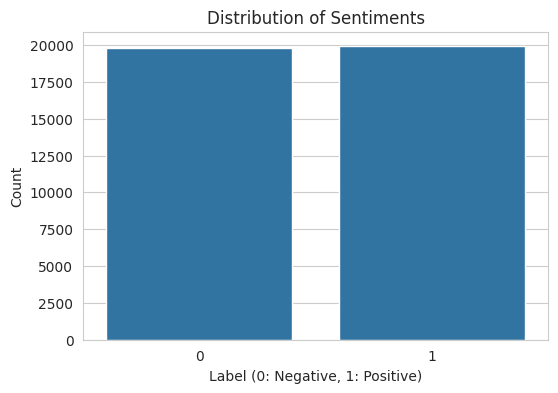

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Label (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [20]:
print("\n5. The data is well-balanced.")


5. The data is well-balanced.


What does the length of reviews vs the sentiment graph look like?

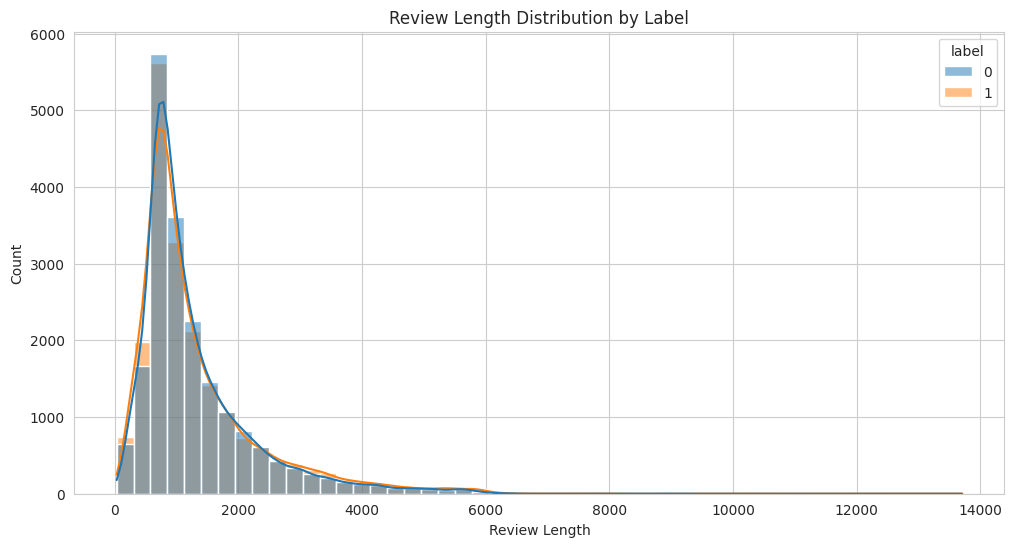


6. Review length distribution plotted. Both labels have a similar length distribution.
--- EDA Complete ---


In [22]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Review Length Distribution by Label')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

print("\n6. Review length distribution plotted. Both labels have a similar length distribution.")
print("--- EDA Complete ---")

## **4. DATA PRE-PROCESSING**

In [24]:
print("\n--- Starting Data Pre-processing ---")

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Cleans and preprocesses a single text entry.
    """
    # 1. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # 2. Remove special characters and numbers, keep only letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 3. Convert to lowercase
    text = text.lower()
    # 4. Tokenize
    tokens = text.split()
    # 5. Remove stopwords and perform lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # 6. Join tokens back into a string
    return " ".join(cleaned_tokens)

# Apply the preprocessing function to the text column
print("Applying preprocessing to all reviews...")
df['cleaned_text'] = df['text'].apply(preprocess_text)
print("Preprocessing complete.")


--- Starting Data Pre-processing ---
Applying preprocessing to all reviews...
Preprocessing complete.


In [25]:
print("\nExample of original vs. cleaned review:")
print("Original:", df['text'].iloc[0])
print("Cleaned:", df['cleaned_text'].iloc[0])


Example of original vs. cleaned review:
Original: I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
Cleaned: grew b watching loving thunderbird mate school watched played thu

## **5. TRAIN/TEST SPLIT**

In [26]:
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData split into training and testing sets.")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Data split into training and testing sets.
Training set size: 31778
Testing set size: 7945


## **6. FEATURE EXTRACTION & MODELING**


--- Starting Feature Extraction and Model Training ---

--- Using TF-IDF Vectorizer ---
Training Logistic Regression...
Results for Logistic Regression with TF-IDF:
  Accuracy: 0.8872
  F1-Score: 0.8872
  ROC-AUC: 0.9542


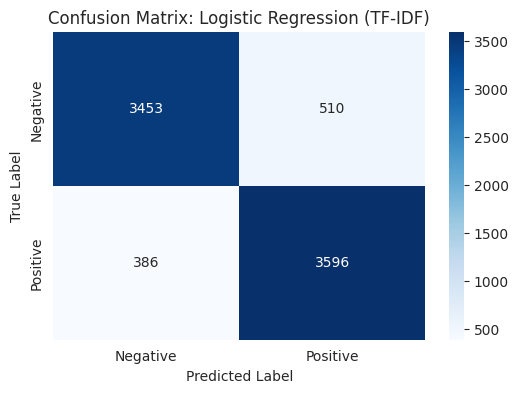

Training Bernoulli Naive Bayes...
Results for Bernoulli Naive Bayes with TF-IDF:
  Accuracy: 0.8395
  F1-Score: 0.8395
  ROC-AUC: 0.9144


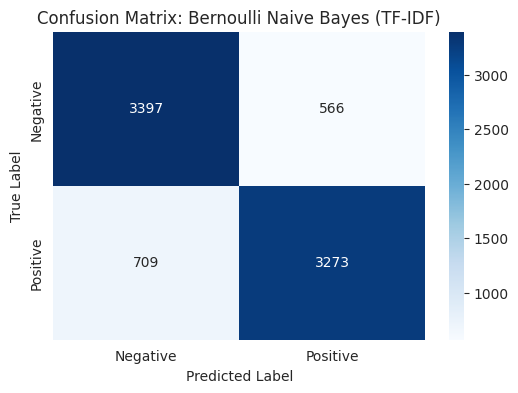

Training Linear SVM...
Results for Linear SVM with TF-IDF:
  Accuracy: 0.8789
  F1-Score: 0.8789
  ROC-AUC: 0.9505


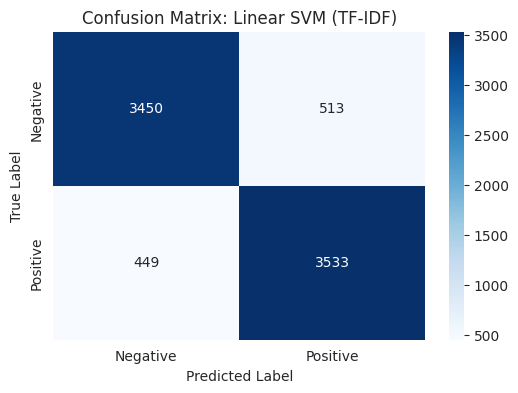

Training Random Forest...
Results for Random Forest with TF-IDF:
  Accuracy: 0.8276
  F1-Score: 0.8275
  ROC-AUC: 0.9118


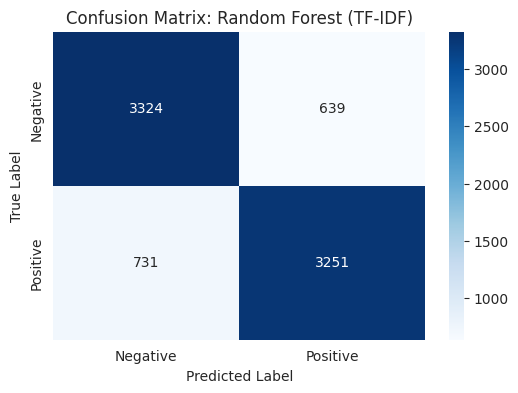


--- Using Bag of Words Vectorizer ---
Training Logistic Regression...
Results for Logistic Regression with Bag of Words:
  Accuracy: 0.8663
  F1-Score: 0.8663
  ROC-AUC: 0.9354


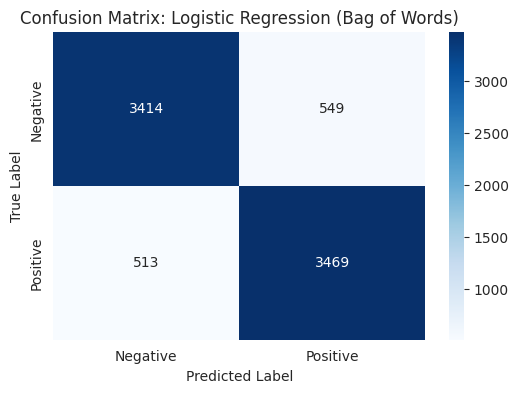

Training Bernoulli Naive Bayes...
Results for Bernoulli Naive Bayes with Bag of Words:
  Accuracy: 0.8395
  F1-Score: 0.8395
  ROC-AUC: 0.9144


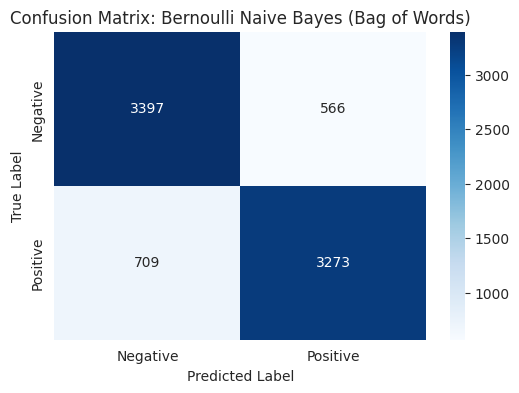

Training Linear SVM...
Results for Linear SVM with Bag of Words:
  Accuracy: 0.8439
  F1-Score: 0.8439
  ROC-AUC: 0.9151


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


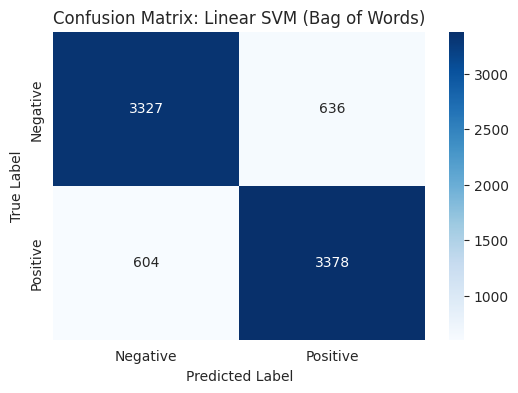

Training Random Forest...
Results for Random Forest with Bag of Words:
  Accuracy: 0.8283
  F1-Score: 0.8283
  ROC-AUC: 0.9110


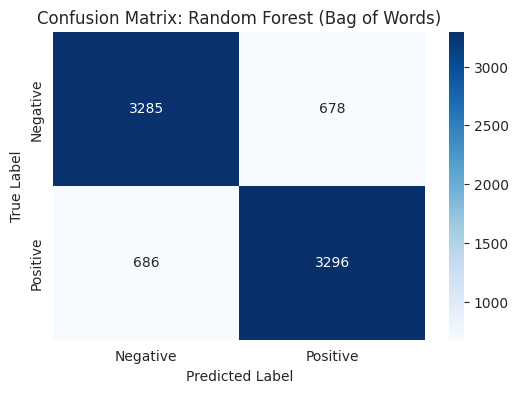

In [27]:
print("\n--- Starting Feature Extraction and Model Training ---")

# We will compare TF-IDF and Bag of Words (CountVectorizer)
vectorizers = {
    'TF-IDF': TfidfVectorizer(max_features=10000),
    'Bag of Words': CountVectorizer(max_features=10000)
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Linear SVM': LinearSVC(max_iter=5000, dual=True), # Added dual=True to handle potential convergence issues with small data
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1) # Using fewer estimators for speed
}

results = []

# Loop through each vectorizer
for vec_name, vectorizer in vectorizers.items():
    print(f"\n--- Using {vec_name} Vectorizer ---")

    # Fit and transform the training data
    X_train_vec = vectorizer.fit_transform(X_train)
    # Transform the test data
    X_test_vec = vectorizer.transform(X_test)

    # Loop through each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # Train the model
        model.fit(X_train_vec, y_train)

        # Make predictions
        y_pred = model.predict(X_test_vec)

        # Evaluate
        accuracy = accuracy_score(y_test, y_pred)
        f1 = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']['f1-score']

        # Calculate ROC-AUC score
        # For some models, we need probability scores
        try:
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test_vec)[:, 1]
            else: # For SVM
                y_prob = model.decision_function(X_test_vec)
            roc_auc = roc_auc_score(y_test, y_prob)
        except ValueError: # ROC AUC is not defined for a single class in y_true
            roc_auc = 0.0
            print(f"  Could not calculate ROC-AUC for {model_name}, not enough class diversity in test set.")


        # Store results
        results.append({
            'Vectorizer': vec_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

        print(f"Results for {model_name} with {vec_name}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  ROC-AUC: {roc_auc:.4f}")

        # Display Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title(f'Confusion Matrix: {model_name} ({vec_name})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

## **7. RESULTS COMPARISON**

In [28]:
print("\n--- Overall Model Comparison ---")
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))


--- Overall Model Comparison ---
     Vectorizer                  Model  Accuracy  F1-Score   ROC-AUC
0        TF-IDF    Logistic Regression  0.887225  0.887193  0.954219
2        TF-IDF             Linear SVM  0.878918  0.878907  0.950538
4  Bag of Words    Logistic Regression  0.866331  0.866327  0.935390
6  Bag of Words             Linear SVM  0.843927  0.843923  0.915092
5  Bag of Words  Bernoulli Naive Bayes  0.839522  0.839477  0.914399
1        TF-IDF  Bernoulli Naive Bayes  0.839522  0.839477  0.914399
3        TF-IDF          Random Forest  0.827565  0.827546  0.911804
7  Bag of Words          Random Forest  0.828320  0.828320  0.911031


## **8. A SIMPLE NEURAL NETWORK**

In [29]:
print("\n--- Building a Simple Neural Network with Keras ---")

# Parameters
VOCAB_SIZE = 10000
MAX_LEN = 250
EMBEDDING_DIM = 16

# 1. Tokenize text for Keras
keras_tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
keras_tokenizer.fit_on_texts(X_train)

# 2. Convert text to sequences of integers
X_train_seq = keras_tokenizer.texts_to_sequences(X_train)
X_test_seq = keras_tokenizer.texts_to_sequences(X_test)

# 3. Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# 4. Build the model
nn_model = Sequential([
    # Embedding layer turns word indices into dense vectors of a fixed size.
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    # GlobalAveragePooling1D averages the vectors for all words in a review.
    GlobalAveragePooling1D(),
    # A standard dense layer for learning patterns.
    Dense(24, activation='relu'),
    # Output layer with a single neuron and sigmoid activation for binary classification.
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

print("\nNeural Network Model Summary:")
nn_model.summary()

# 5. Train the model
print("\nTraining the Neural Network...")
# Use fewer epochs for the dummy data to run quickly
epochs = 2 if is_dummy_data else 10
history = nn_model.fit(X_train_pad, y_train,
                       epochs=epochs,
                       validation_data=(X_test_pad, y_test),
                       verbose=2)

# 6. Evaluate the model
loss, accuracy = nn_model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\nNeural Network Test Accuracy: {accuracy:.4f}")

# Make predictions to calculate F1 and ROC-AUC
y_prob_nn = nn_model.predict(X_test_pad).flatten()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

f1_nn = classification_report(y_test, y_pred_nn, output_dict=True, zero_division=0)['weighted avg']['f1-score']
try:
    roc_auc_nn = roc_auc_score(y_test, y_prob_nn)
except ValueError:
    roc_auc_nn = 0.0

print(f"Neural Network F1-Score: {f1_nn:.4f}")
print(f"Neural Network ROC-AUC: {roc_auc_nn:.4f}")

# Append to results dataframe
nn_results = pd.DataFrame([{
    'Vectorizer': 'Keras Tokenizer',
    'Model': 'Simple NN',
    'Accuracy': accuracy,
    'F1-Score': f1_nn,
    'ROC-AUC': roc_auc_nn
}])

results_df = pd.concat([results_df, nn_results], ignore_index=True)


--- Building a Simple Neural Network with Keras ---

Neural Network Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training the Neural Network...
Epoch 1/10
994/994 - 8s - 8ms/step - accuracy: 0.7322 - loss: 0.5316 - val_accuracy: 0.8307 - val_loss: 0.3761
Epoch 2/10
994/994 - 10s - 10ms/step - accuracy: 0.8727 - loss: 0.3064 - val_accuracy: 0.8486 - val_loss: 0.3373
Epoch 3/10
994/994 - 8s - 8ms/step - accuracy: 0.8956 - loss: 0.2596 - val_accuracy: 0.8571 - val_loss: 0.3291
Epoch 4/10
994/994 - 6s - 6ms/step - accuracy: 0.9061 - loss: 0.2332 - val_accuracy: 0.8121 - val_loss: 0.4178
Epoch 5/10
994/994 - 7s - 7ms/step - accuracy: 0.9133 - loss: 0.2159 - val_accuracy: 0.8590 - val_loss: 0.3357
Epoch 6/10
994/994 - 11s - 11ms/step - accuracy: 0.9203 - loss: 0.2028 - val_accuracy: 0.8459 - val_loss: 0.3631
Epoch 7/10
994/994 - 10s - 10ms/step - accuracy: 0.9249 - loss: 0.1914 - val_accuracy: 0.8862 - val_loss: 0.2951
Epoch 8/10
994/994 - 9s - 9ms/step - accuracy: 0.9313 - loss: 0.1776 - val_accuracy: 0.8801 - val_loss: 0.3125
Epoch 9/10
994/994 - 9s - 10ms/step - accuracy: 0.9359 - loss: 0.1704 - va

## **9. FINAL CONCLUSION**

In [30]:
print("\n--- Final Results Summary ---")
print(results_df.sort_values(by='ROC-AUC', ascending=False))


--- Final Results Summary ---
        Vectorizer                  Model  Accuracy  F1-Score   ROC-AUC
0           TF-IDF    Logistic Regression  0.887225  0.887193  0.954219
2           TF-IDF             Linear SVM  0.878918  0.878907  0.950538
8  Keras Tokenizer              Simple NN  0.879421  0.879171  0.948407
4     Bag of Words    Logistic Regression  0.866331  0.866327  0.935390
6     Bag of Words             Linear SVM  0.843927  0.843923  0.915092
5     Bag of Words  Bernoulli Naive Bayes  0.839522  0.839477  0.914399
1           TF-IDF  Bernoulli Naive Bayes  0.839522  0.839477  0.914399
3           TF-IDF          Random Forest  0.827565  0.827546  0.911804
7     Bag of Words          Random Forest  0.828320  0.828320  0.911031
